![title](https://i.imgur.com/XXrmxpp.jpeg)

> *Avatar: The Last Airbender*, known as *Avatar: The Legend of Aang* in some regions, is an American animated television series produced by Nickelodeon Animation Studios. It aired on Nickelodeon for three seasons, from February 2005 to July 2008.
>
> <br>
>
> Avatar is set in an Asiatic-like world in which certain people can manipulate one of the four elements — water, earth, fire, or air—with telekinetic variants of the Chinese martial arts known as "bending". The only individual who can bend all four elements, the "Avatar", is responsible for maintaining balance between the world's four nations, and serves as the bridge between the physical world and the spirit world. 
>
> <br>
>
> @Wikipedia

![](https://64.media.tumblr.com/b1dc757e072b20026108c8cfcd640c85/tumblr_nvxnup0gzN1uic2oco1_640.jpg)

TO DO: <br>
- [ ] write smth about high position of Avatar in the IMDb top and its popularity
- [ ] attach a link https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250

In [45]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

In [46]:
# reading data from .csv files

avatar = pd.read_csv('tables/avatar.csv', encoding = "ISO-8859-1", index_col=0)
data = pd.read_csv('tables/avatar_data.csv', index_col=0)
scenes = pd.read_csv('tables/scenes.csv', encoding = "ISO-8859-1", index_col=0)
series = pd.read_csv('tables/series_names.csv', index_col=0)

In [47]:
engine = create_engine('sqlite://', echo=False)

In [48]:
avatar.to_sql('avatar', con=engine, index='False')
data.to_sql('data', con=engine, index='False')
scenes.to_sql('scenes', con=engine, index='False')
series.to_sql('series', con=engine, index='False')

<h2 align="center"> Preliminary Data Analysis </h2> 

First of all, let's look at our dataset and analyze the contents of the tables. <br>
With the cell below we get the names of table columns. <br>

In [49]:
# names of table columns

dataset_columns = {}

def make_df(table_name, table_columns, res=dataset_columns):
    for col in table_columns:
        if col not in res:
            res[col] = table_name
        else:
            res[col] += ', {}'.format(table_name)
    
make_df('Avatar', avatar.columns.tolist())
make_df('Data', data.columns.tolist())
make_df('Scenes', scenes.columns.tolist())
make_df('Series', series.columns.tolist())

columns_df = pd.DataFrame(list(dataset_columns.items()), columns=['Column', 'Tables'])
print(columns_df)

               Column                Tables
0                  id        Avatar, Scenes
1                book  Avatar, Data, Series
2            book_num                Avatar
3             chapter                Avatar
4         chapter_num                Avatar
5           character                Avatar
6           full_text                Avatar
7     character_words                Avatar
8              writer                Avatar
9            director          Avatar, Data
10        imdb_rating          Avatar, Data
11         book_chapt                  Data
12         true_chapt                  Data
13      series_rating          Data, Series
14  scene_description                Scenes
15            halfway                Series


In [50]:
# number of episodes in each book sorted in chronological order
episodes_cnt = engine.execute("""
                              SELECT book, COUNT(1) AS episodes
                              FROM data
                              GROUP BY book
                              ORDER BY book_chapt
                              """)
episodes_cnt_df = pd.DataFrame(episodes_cnt.fetchall())
episodes_cnt_df.columns = episodes_cnt.keys()

episodes_cnt_df

,book,episodes
0,Water,20
1,Earth,20
2,Fire,21


In [51]:
# number of episodes in each book
data[['book', 'book_chapt']].groupby(['book']).count()

,book_chapt
book,
Earth,20
Fire,21
Water,20


In [52]:
# total number of episodes 
data['book_chapt'].count()

61

In [53]:
# summary statistics of imdb_rating from the Data table
data['imdb_rating'].describe()

count    61.000000
mean      8.683607
std       0.598660
min       7.100000
25%       8.200000
50%       8.700000
75%       9.100000
max       9.800000
Name: imdb_rating, dtype: float64

In [54]:
# summary statistics of imdb_rating from the Avatar table
avatar[['id', 'imdb_rating']].describe()

,id,imdb_rating
count,13385.000000,13224.000000
mean,6693.000000,8.624486
std,3864.061011,0.565143
min,1.000000,7.100000
25%,3347.000000,8.200000
50%,6693.000000,8.700000
75%,10039.000000,9.100000
max,13385.000000,9.800000


Count of *id* and count of *imdb_rating* are different. It means that there are some NaN or Null values in the *imdb_rating* column.

In [55]:
# the first and the last rows with the NaN imdb_rating
avatar[avatar['imdb_rating'].isnull()].iloc[[0, -1]]

,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
4460,4460,Water,1,"The Siege of the North, Part 2",20,Scene Description,The episode opens to the Northern Water Tribe ...,NaN,Aaron Ehasz,Dave Filoni,NaN
4620,4620,Water,1,"The Siege of the North, Part 2",20,Scene Description,Fades to credits.,NaN,Aaron Ehasz,Dave Filoni,NaN


In [56]:
# the 20th episode in the Data table
data[data['book_chapt'] == 20]

,book,director,imdb_rating,book_chapt,true_chapt,series_rating
20,Water,Dave Filoni,9.7,20,19,8.336991


There is no rating for the 20th episode in the Avatar table, but it is in the Data table, so it is better to use values from the Data table to analyse ratings of episodes.

<h2 align="center"> IMDb Ratings and Episodes </h2> 

In [57]:
sns.set_theme(style="darkgrid")

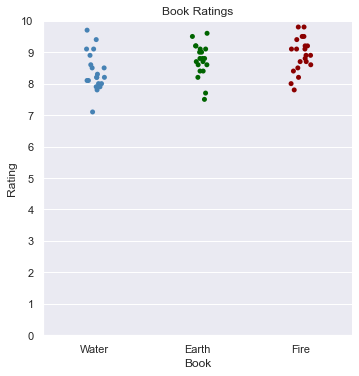

In [58]:
sns.catplot(x='book', y='imdb_rating', data=data,
            palette=['#4682B4', '#006400', '#8B0000'])
plt.title('Book Ratings')
plt.xlabel('Book')
plt.ylabel('Rating')
plt.yticks(range(0, 11))

plt.show()

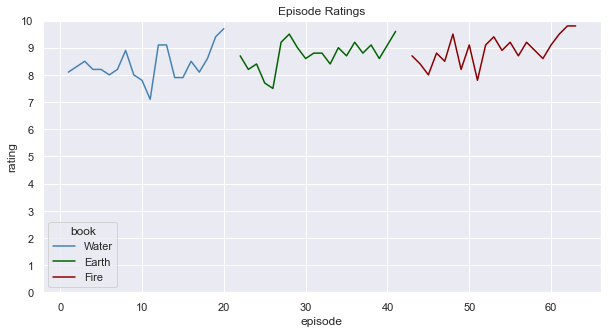

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(x='book_chapt', y='imdb_rating', hue='book', data=data,
             palette=['#4682B4', '#006400', '#8B0000'])
plt.title('Episode Ratings')
plt.xlabel('episode')
plt.ylabel('rating')
plt.yticks(range(0, 11))

plt.show()

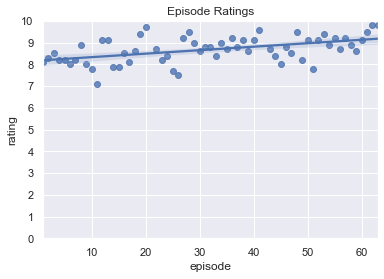

In [60]:
sns.regplot(x='book_chapt', y='imdb_rating', data=data)
plt.title('Episode Ratings')
plt.xlabel('episode')
plt.ylabel('rating')
plt.yticks(range(0, 11))

plt.show()

In [61]:
stats.ttest_ind(data['book_chapt'], data['imdb_rating'])

Ttest_indResult(statistic=9.827235525153414, pvalue=4.4353484124194516e-17)